In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

'2.4.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/test.zip" -d "/content"
!unzip "/content/drive/MyDrive/Colab Notebooks/train.zip" -d "/content"

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
image_size = (32,32)
batch_size = 32
train_flow_path = '/content/train' 
test_flow_path = '/content/test'

In [ ]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

train_images = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A', 'B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

test_images = data_gen_test.flow_from_directory(
    test_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A','B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, BatchNormalization

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
history = model.fit(train_images, epochs=50, validation_data = test_images)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
32/32 [==============================] - 1s 26ms/step - loss: 1.2856 - accuracy: 0.4625 - val_loss: 31.1778 - val_accuracy: 0.2000
Epoch 2/50
32/32 [==============================] - 0s 15ms/step - loss: 0.5180 - accuracy: 0.8272 - val_loss: 22.8439 - val_accuracy: 0.2760
Epoch 3/50
32/32 [==============================] - 0s 15ms/step - loss: 0.2635 - accuracy: 0.9144 - val_loss: 18.8475 - val_accuracy: 0.2080
Epoch 4/50
32/32 [==============================] - 0s 14ms/step - loss: 0.2200 - accuracy: 0.9281 - val_loss: 12.9702 - val_accuracy: 0.3080
Epoch 5/50
32/32 [==============================] - 0s 14ms/step - loss: 0.1773 - accuracy: 0.9580 - val_loss: 17.5503 - val_accuracy: 0.2080
Epoch 6/50
32/32 [==============================] - 0s 15ms/step - loss: 0.2020 - accuracy: 0.9424 - val_loss: 12.4146 - val_accuracy: 0.3680
Epoch 7/50
32/32 [==============================] - 0s 14ms/step - loss: 0.1870 - accuracy: 0.9292 - val_loss: 20.3034 - val_accuracy: 0.2420
Epoch 

In [ ]:
scores = model.evaluate(test_images)
print(f'* Loss = {scores[0]}\n* Accuracy = {scores[1]}')

16/16 [==============================] - 0s 8ms/step - loss: 9.2441 - accuracy: 0.3600
* Loss = 9.24406623840332
* Accuracy = 0.36000001430511475


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
from keras.utils.vis_utils import plot_model

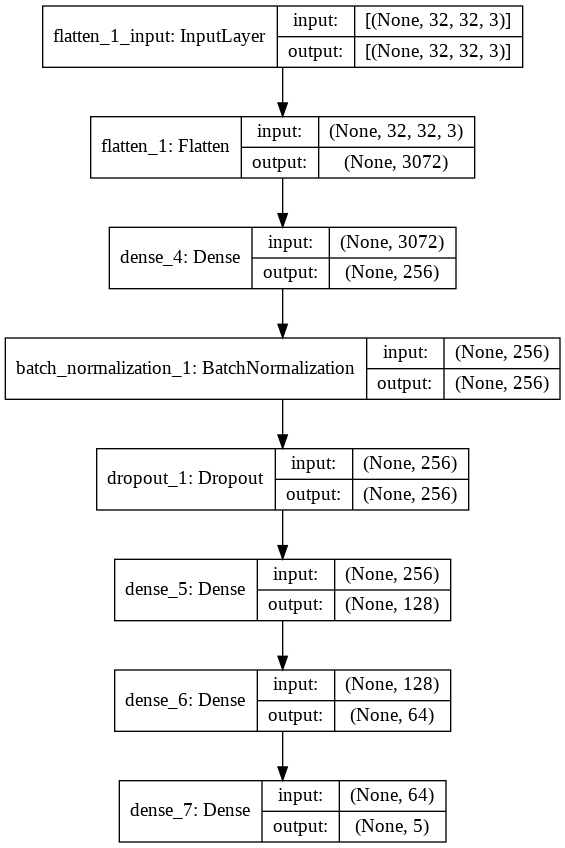

In [ ]:
plot_model(model, to_file='./Multy_layer_model.png', show_shapes=True, show_layer_names=True)

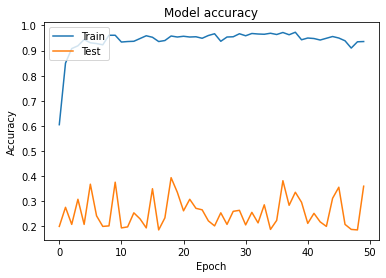

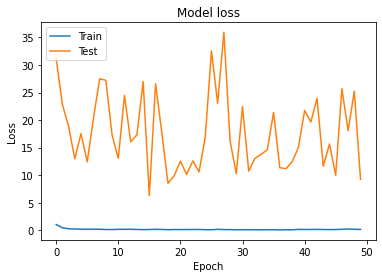

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./Multy_layer_accuracy.png')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./Multy_layer_loss.png')
plt.show()